<a href="https://colab.research.google.com/github/ravi-kiran-iiml/my_git/blob/deep_learning/digits_multi_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

About dataset

Load and return the digits dataset (classification).

Each datapoint is a 8x8 image of a digit.

Classes 10

Samples per class ~180

Samples total 1797

Dimensionality 64

Features integers 0-16

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

we start with importing pandas and numpy libraries

In [0]:
import pandas as pd
import numpy as np


we import the dataset from scikit learn datasets

Input is given by dataset.data method while

Labels is obtained through dataset.target method



In [0]:


from sklearn.datasets import load_digits
digits = load_digits()
X= digits.data # .data for X values
y = digits.target # .target for labels
print(X.shape)
print(y.shape)
print(X[0])
print(y)

(1797, 64)
(1797,)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0 1 2 ... 8 9 8]


we normalise the input data using Standard Scaler method

In [0]:
# data normalization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(X)

we have 10 unique labels : 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

we one-hot-encode these labels through to_categorical method in keras

In [0]:
# label one hot encoding

from keras.utils.np_utils import to_categorical
y_categorical = to_categorical(y)

Using TensorFlow backend.


now we split the dataset in training and validation datasets

In [0]:
# train test split 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_categorical, test_size = 0.25)

we create the neural network model and compile it

In [0]:
# creating the model

from keras import models
from keras import layers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

we train the model on the training data and validation data

In [0]:
# training the data

h = model.fit(x_train, y_train, epochs = 100, batch_size = 50, validation_data = (x_test, y_test))


Train on 1347 samples, validate on 450 samples
Epoch 1/100
1347/1347 [==============================] - 0s 258us/step - loss: 2.1340 - accuracy: 0.3378 - val_loss: 1.5818 - val_accuracy: 0.6622
Epoch 2/100
1347/1347 [==============================] - 0s 36us/step - loss: 1.5270 - accuracy: 0.5999 - val_loss: 1.0679 - val_accuracy: 0.8111
Epoch 3/100
1347/1347 [==============================] - 0s 35us/step - loss: 1.1401 - accuracy: 0.7201 - val_loss: 0.7573 - val_accuracy: 0.8689
Epoch 4/100
1347/1347 [==============================] - 0s 35us/step - loss: 0.8739 - accuracy: 0.7914 - val_loss: 0.5708 - val_accuracy: 0.9022
Epoch 5/100
1347/1347 [==============================] - 0s 39us/step - loss: 0.7294 - accuracy: 0.8293 - val_loss: 0.4541 - val_accuracy: 0.9244
Epoch 6/100
1347/1347 [==============================] - 0s 35us/step - loss: 0.6291 - accuracy: 0.8530 - val_loss: 0.3901 - val_accuracy: 0.9356
Epoch 7/100
1347/1347 [==============================] - 0s 38us/step - loss

we calculate predictions using model.predict approach

In [0]:
# make predictions

predictions = model.predict(x_test)

we compare the loss on training and validation data 

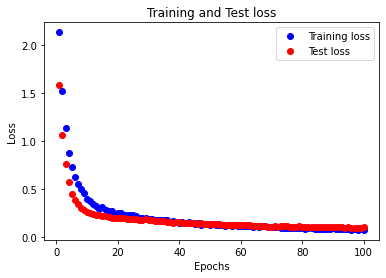

In [0]:
# plotting loss

import matplotlib.pyplot as plt

history_dict =  h.history

train_loss = history_dict['loss']
test_loss = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy'])+1)

plt.plot(epochs, train_loss, 'bo', label = 'Training loss')
plt.plot(epochs, test_loss, 'ro', label = 'Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

we plot accuracy output

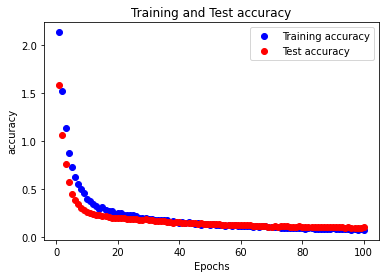

In [0]:
import matplotlib.pyplot as plt

history_dict =  h.history

train_accuracy = history_dict['accuracy']
test_accuracy = history_dict['val_accuracy']

epochs = range(1, len(history_dict['accuracy'])+1)

plt.plot(epochs, train_loss, 'bo', label = 'Training accuracy')
plt.plot(epochs, test_loss, 'ro', label = 'Test accuracy')
plt.title('Training and Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

# we arrive at 99.41% and 98.22% accuracy on training and validation datasets respectively